In [1]:
# Import data and take a look
import numpy as np
import pandas as pd

df = pd.read_csv('employee_promotion.csv', na_values=['#NAME?'])

In [2]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [3]:
df["education"] = [0 if x == "Bachelor's" else 1 for x in df['education']]

In [4]:
X= df.drop('education' ,1)
y= df.education

In [5]:
print(X.head(5))

   employee_id         department     region gender recruitment_channel  \
0        65438  Sales & Marketing   region_7      f            sourcing   
1        65141         Operations  region_22      m               other   
2         7513  Sales & Marketing  region_19      m            sourcing   
3         2542  Sales & Marketing  region_23      m               other   
4        48945         Technology  region_26      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won  \
0                1   35                   5.0                  8           0   
1                1   30                   5.0                  4           0   
2                1   34                   3.0                  7           0   
3                2   39                   1.0                 10           0   
4                1   45                   3.0                  2           0   

   avg_training_score  is_promoted  
0                49.0          

In [6]:
print(y.head(5))

0    1
1    0
2    0
3    0
4    0
Name: education, dtype: int64


# Basic Data Cleaning

In [7]:
print(df['department'].head(5))

0    Sales & Marketing
1           Operations
2    Sales & Marketing
3    Sales & Marketing
4           Technology
Name: department, dtype: object


In [8]:
print(pd.get_dummies(df['department']).head(5))

   Analytics  Finance  HR  Legal  Operations  Procurement  R&D  \
0          0        0   0      0           0            0    0   
1          0        0   0      0           1            0    0   
2          0        0   0      0           0            0    0   
3          0        0   0      0           0            0    0   
4          0        0   0      0           0            0    0   

   Sales & Marketing  Technology  
0                  1           0  
1                  0           0  
2                  1           0  
3                  1           0  
4                  0           1  


In [9]:
# Decide which categorical variables you want to use in model
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'department' has 9 unique categories
Feature 'region' has 34 unique categories
Feature 'gender' has 2 unique categories
Feature 'recruitment_channel' has 3 unique categories


In [10]:
print(df['region'].value_counts().sort_values(ascending=False).head(10))

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
Name: region, dtype: int64


In [11]:
df['region'] = ['region_2' if x == 'region_2' else 'Other' for x in X['region']]

print(df['region'].value_counts().sort_values(ascending=False))

Other       42465
region_2    12343
Name: region, dtype: int64


In [12]:
todummy_list = ['region','no_of_trainings','previous_year_rating','length_of_service','awards_won','avg_training_score','is_promoted']

In [13]:
todummy_list

['region',
 'no_of_trainings',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [14]:
# Dummy List

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df


In [15]:
df = dummy_df(df, todummy_list)

In [16]:
print(df.head(5))

   employee_id         department  education gender recruitment_channel  age  \
0        65438  Sales & Marketing          1      f            sourcing   35   
1        65141         Operations          0      m               other   30   
2         7513  Sales & Marketing          0      m            sourcing   34   
3         2542  Sales & Marketing          0      m               other   39   
4        48945         Technology          0      m               other   45   

   region_Other  region_region_2  no_of_trainings_1  no_of_trainings_2  ...  \
0             1                0                  1                  0  ...   
1             1                0                  1                  0  ...   
2             1                0                  1                  0  ...   
3             1                0                  0                  1  ...   
4             1                0                  1                  0  ...   

   avg_training_score_92.0  avg_training_sco

In [17]:
df=df.drop('department' ,1)

In [18]:
df.head(5)

,employee_id,education,gender,recruitment_channel,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438,1,f,sourcing,35,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,65141,0,m,other,30,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7513,0,m,sourcing,34,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,0,m,other,39,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,0,m,other,45,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df.isnull().sum().sort_values(ascending=False).head()

is_promoted_1           0
is_promoted_0           0
length_of_service_10    0
length_of_service_11    0
length_of_service_12    0
dtype: int64

In [20]:
 pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.1.1)
Note: you may need to restart the kernel to use updated packages.


In [21]:
df=df.drop('recruitment_channel',1)

In [22]:
df.head()

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438,1,f,35,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,65141,0,m,30,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7513,0,m,34,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,0,m,39,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,0,m,45,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df["gender"] = [0 if x == "m" else 1 for x in df['gender']]

In [24]:
df.head(10)

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438,1,1,35,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,65141,0,0,30,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7513,0,0,34,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,0,0,39,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,0,0,45,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,58896,0,0,31,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,20379,0,1,31,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,16290,1,0,33,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,73202,0,0,28,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,28911,1,0,32,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')#imp = SimpleImputer(missing_values='NaN', strategy='median')

In [26]:
imp.fit(df)
df= pd.DataFrame(data=imp.transform(df) , columns=df.columns)

In [27]:
print(df.head(5))

   employee_id  education  gender   age  region_Other  region_region_2  \
0      65438.0        1.0     1.0  35.0           1.0              0.0   
1      65141.0        0.0     0.0  30.0           1.0              0.0   
2       7513.0        0.0     0.0  34.0           1.0              0.0   
3       2542.0        0.0     0.0  39.0           1.0              0.0   
4      48945.0        0.0     0.0  45.0           1.0              0.0   

   no_of_trainings_1  no_of_trainings_2  no_of_trainings_3  no_of_trainings_4  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                0.0                1.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   ...  avg_training_score_92.0  avg_training_score_93.0  \
0  ...  

In [28]:
df.head(5)

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65141.0,0.0,0.0,30.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7513.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2542.0,0.0,0.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48945.0,0.0,0.0,45.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# now check if there is any missing values 

df.isnull().sum().sort_values(ascending=False).head()

is_promoted_1           0
length_of_service_23    0
length_of_service_11    0
length_of_service_12    0
length_of_service_13    0
dtype: int64

So now our Data is clean ... Lets work on Models Now

# Rule Based Learning Model

In [30]:
df.head(10)

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65141.0,0.0,0.0,30.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7513.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2542.0,0.0,0.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48945.0,0.0,0.0,45.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,58896.0,0.0,0.0,31.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20379.0,0.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,16290.0,1.0,0.0,33.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,73202.0,0.0,0.0,28.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,28911.0,1.0,0.0,32.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df2 = pd.read_csv('employee_promotion.csv', na_values=['#NAME?'])

In [32]:
df2.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63.0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83.0,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54.0,0


In [33]:
df2.isnull().sum().sort_values(ascending=False).head()

previous_year_rating    4124
avg_training_score      2560
education               2409
is_promoted                0
awards_won                 0
dtype: int64

In [34]:
df2 = df2.dropna()

In [35]:
df2.isnull().sum().sort_values(ascending=False).head()

is_promoted             0
avg_training_score      0
awards_won              0
length_of_service       0
previous_year_rating    0
dtype: int64

In [36]:
df2.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63.0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83.0,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54.0,0


In [37]:
check1=df2[df2.is_promoted==1]

In [38]:
check1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50.0,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51.0,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,0,47.0,1
69,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,0,84.0,1
71,24040,Technology,region_22,Master's & above,m,other,1,34,5.0,7,0,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54730,51059,Sales & Marketing,region_2,Bachelor's,m,other,1,29,5.0,4,0,58.0,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81.0,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,0,86.0,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65.0,1


In [39]:
check1['length_of_service']<2

11       False
39       False
60       False
69       False
71       False
         ...  
54730    False
54757    False
54761    False
54792    False
54796    False
Name: length_of_service, Length: 4071, dtype: bool

Here we analyse that where the length of service is less than 2 and average training score is less than 40  for that employee they are not getting promoted

So lets create a rule

Lets work with decision tree and after that lets create a rule (ILP)

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
#iris = load_iris()


In [41]:
df2.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [43]:
df

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65141.0,0.0,0.0,30.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7513.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2542.0,0.0,0.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48945.0,0.0,0.0,45.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030.0,0.0,0.0,48.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54804,74592.0,1.0,1.0,37.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54805,13918.0,0.0,0.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54806,13614.0,1.0,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
df

,employee_id,education,gender,age,region_Other,region_region_2,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,...,avg_training_score_92.0,avg_training_score_93.0,avg_training_score_94.0,avg_training_score_95.0,avg_training_score_96.0,avg_training_score_97.0,avg_training_score_98.0,avg_training_score_99.0,is_promoted_0,is_promoted_1
0,65438.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,65141.0,0.0,0.0,30.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7513.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2542.0,0.0,0.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48945.0,0.0,0.0,45.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030.0,0.0,0.0,48.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54804,74592.0,1.0,1.0,37.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54805,13918.0,0.0,0.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54806,13614.0,1.0,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [47]:
feature_names=['no_of_trainings','length_of_service','previous_year_rating','avg_training_score']

In [48]:
df2

X = df
y = df['is_promoted_0']


In [49]:
import pandas as pd

# Features "id" and "Unnamed: 32" should be removed
feature_names=['no_of_trainings','length_of_service','previous_year_rating','avg_training_score']
data = df2[['no_of_trainings','length_of_service','previous_year_rating','avg_training_score']]
target=df2[['is_promoted']]
decision_tree = DecisionTreeClassifier(random_state=1,ccp_alpha=0.1)
decision_tree = decision_tree.fit(data, target)
r = export_text(decision_tree, feature_names=feature_names)
print(r)

|--- class: 0



In [50]:
import pandas as pd

# Features "id" and "Unnamed: 32" should be removed
feature_names=['no_of_trainings','length_of_service','previous_year_rating','avg_training_score']
data = df2[['no_of_trainings','length_of_service','previous_year_rating','avg_training_score']]
target=df2[['is_promoted']]
decision_tree = DecisionTreeClassifier(random_state=1,ccp_alpha=0)
decision_tree = decision_tree.fit(data, target)
r = export_text(decision_tree, feature_names=feature_names)
print(r)

|--- avg_training_score <= 90.50
|   |--- previous_year_rating <= 4.50
|   |   |--- previous_year_rating <= 2.50
|   |   |   |--- avg_training_score <= 55.50
|   |   |   |   |--- previous_year_rating <= 1.50
|   |   |   |   |   |--- length_of_service <= 6.50
|   |   |   |   |   |   |--- avg_training_score <= 46.50
|   |   |   |   |   |   |   |--- length_of_service <= 2.50
|   |   |   |   |   |   |   |   |--- no_of_trainings <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- no_of_trainings >  1.50
|   |   |   |   |   |   |   |   |   |--- avg_training_score <= 45.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- avg_training_score >  45.00
|   |   |   |   |   |   |   |   |   |   |--- no_of_trainings <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_trainings >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |  

# Create the set of Rules for Employee that are getting promoted with Class 1 and Class 0 , Here Class is linked to Promotion Column.


In [51]:
!pip install pyswip 
# Or 
#!pip3 install pyswip

Defaulting to user installation because normal site-packages is not writeable


In [52]:
pip install PyILP

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [119]:
from  PyILP.PyILP import *
model_1=aleph_learn(file="emp.pl", positive_example="emp_pos.f",negative_example=[], test_size=0.35)

['promoted(0,length_of_service).', 'promoted(1,length_of_service).', 'promoted(2,length_of_service).', 'promoted(3,length_of_service).', 'promoted(4,length_of_service).', 'promoted(5,length_of_service).', 'promoted(6,length_of_service).', 'promoted(7,length_of_service).', 'promoted(8,length_of_service).', 'promoted(9,length_of_service).', 'promoted(10,length_of_service).', 'promoted(11,length_of_service).', 'promoted(12,length_of_service).', 'promoted(13,length_of_service).', 'promoted(14,length_of_service).', 'promoted(15,length_of_service).', 'promoted(16,length_of_service).', 'promoted(17,length_of_service).', 'promoted(18,length_of_service).', 'promoted(19,length_of_service).', 'promoted(20,length_of_service).', 'promoted(21,length_of_service).', 'promoted(22,length_of_service).', 'promoted(23,length_of_service).', 'promoted(24,length_of_service).', 'promoted(25,length_of_service).', 'promoted(26,length_of_service).', 'promoted(27,length_of_service).', 'promoted(28,length_of_servic

# Metagol Web Interface

URL :http://ilp.doc.ic.ac.uk/metagol_web_interface/

# Running the ILP using metagol_learn(file="emp_bk.pl")

In [215]:
from  PyILP.PyILP import *
try:
    model_1=metagol_learn(file="emp_bk.pl",test_size=0.35, settings="emp_setting.pl", positive_example="emp_pos.f", negative_example="emp_neg.f")
except:
    pass

[]
+----------+ Learning +----------+
+---------------------+------------------+------------------+
|       n = 213       | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 51               | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 50               | 112              |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.765 |
+-------------+-------+
| Precision   | 1     |
+-------------+-------+
| Sensitivity | 0.505 |
+-------------+-------+
| Specificity | 1     |
+-------------+-------+
| F1 Score    | 0.671 |
+-------------+-------+




****************** Rule sets generated by Aleph for Employee Promotion Dataset:   B1
['promoted(51,length_of_service).', 'promoted(52,length_of_service).', 'promoted(53,length_of_service).', 'promoted(54,length_of_service).', 'promoted(55,length_of_service).', 'promoted(56,length_of_service).', 'promoted(57,length_of_service).', 'promoted(58,length_of_service).', 'promoted(59,length_of_service).', 'promoted(60,length_of_service).', 'promoted(61,length_of_service).', 'promoted(62,length_of_service).', 'promoted(63,length_of_service).', 'promoted(64,length_of_service).', 'promoted(65,length_of_service).', 'promoted(66,length_of_service).', 'promoted(67,length_of_service).', 'promoted(68,length_of_service).', 'promoted(69,length_of_service).', 'promoted(70,length_of_service).', 'promoted(71,length_of_service).', 'promoted(72,length_of_service).', 'promoted(73,length_of_service).', 'promoted(74,length_of_service).', 'promoted(75,length_of_service).', 'promoted(76,length_of_service).', 'p

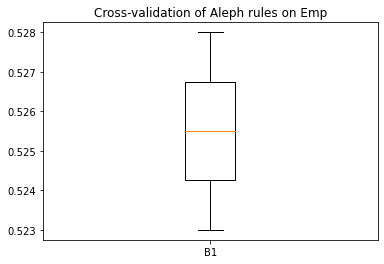

In [213]:
from matplotlib import pyplot
models = []

BK_1="emp.pl"




models.append(('ILP',"B1", BK_1))


#print('****************  eMP Dataset ****************')
#pos, neg= aleph_pos_neg(pos_ex, neg_ex)
results1 = []
names1 = []

avg_time = []
for name, label, model2 in models:
    print("\n")
    print("****************** Rule sets generated by Aleph for Employee Promotion Dataset:  ", label)
    if name=="ILP":
            BK_1="emp.pl"


        # can be changed to 10 fold which will take longer to finish
            model_1=aleph_cross_validation(model2,  CV=2,  positive_example="emp_pos.f", 
                                           negative_example="emp_neg.f")
            cv_results=model_1.accuracy
    else:
        
        kfold = StratifiedKFold(n_splits=0, random_state=1)
        cv_results = cross_val_score(model2, X, y, cv=kfold, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(model_1.time_learn)
    names1.append(label)
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Emp')
pyplot.show()



In [58]:
models

[('ILP', 'B1', 'emp.pl')]

# Dataset 2 income evaluation using ILP. 

In [59]:
file = pd.read_csv('income_eval.csv')

In [60]:
file.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


In [61]:
file.age

0        17
1        17
2        17
3        17
4        17
         ..
32556    90
32557    90
32558    90
32559    90
32560    90
Name: age, Length: 32561, dtype: int64

In [62]:
file[' sex']

0         Female
1         Female
2           Male
3           Male
4           Male
          ...   
32556       Male
32557       Male
32558       Male
32559     Female
32560       Male
Name:  sex, Length: 32561, dtype: object

In [63]:
file[" sex"] = [0 if x == "Male" else 1 for x in file[' sex']]

In [64]:
file.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,White,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,1,0,0,48,Mexico,<=50K
5,17,Private,89821,11th,7,Never-married,Other-service,Own-child,White,1,0,0,10,United-States,<=50K
6,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,White,1,2176,0,18,United-States,<=50K
7,17,?,202521,11th,7,Never-married,?,Own-child,White,1,0,0,40,United-States,<=50K
8,17,?,258872,11th,7,Never-married,?,Own-child,White,1,0,0,5,United-States,<=50K
9,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,White,1,0,0,6,United-States,<=50K


In [65]:
x=file.drop([' sex'],1)

In [66]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,White,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,0,0,48,Mexico,<=50K


In [67]:
y=file.drop([' race'],1)

In [68]:
y.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K


In [69]:
y.dropna(subset=[' workclass'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,1,0,0,30,United-States,<=50K
32557,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,0,0,40,United-States,<=50K
32558,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,1,0,0,40,United-States,>50K
32559,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,25,United-States,<=50K


In [70]:
y.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
5,17,Private,89821,11th,7,Never-married,Other-service,Own-child,1,0,0,10,United-States,<=50K
6,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,1,2176,0,18,United-States,<=50K
7,17,?,202521,11th,7,Never-married,?,Own-child,1,0,0,40,United-States,<=50K
8,17,?,258872,11th,7,Never-married,?,Own-child,1,0,0,5,United-States,<=50K
9,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,1,0,0,6,United-States,<=50K


In [71]:
spec_chars = ["â€¦","ðŸ¥³","?"]
for char in spec_chars:
    y[' workclass'] = y[' workclass'].str.replace(char, ' ')

In [72]:
y.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
5,17,Private,89821,11th,7,Never-married,Other-service,Own-child,1,0,0,10,United-States,<=50K
6,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,1,2176,0,18,United-States,<=50K
7,17,,202521,11th,7,Never-married,?,Own-child,1,0,0,40,United-States,<=50K
8,17,,258872,11th,7,Never-married,?,Own-child,1,0,0,5,United-States,<=50K
9,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,1,0,0,6,United-States,<=50K


In [73]:
y.dropna(subset=[' workclass'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,1,0,0,30,United-States,<=50K
32557,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,1,0,0,40,United-States,<=50K
32558,90,,313986,HS-grad,9,Married-civ-spouse,?,Husband,1,0,0,40,United-States,>50K
32559,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,1,0,0,25,United-States,<=50K


In [74]:
y.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,,304873,10th,6,Never-married,?,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
5,17,Private,89821,11th,7,Never-married,Other-service,Own-child,1,0,0,10,United-States,<=50K
6,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,1,2176,0,18,United-States,<=50K
7,17,,202521,11th,7,Never-married,?,Own-child,1,0,0,40,United-States,<=50K
8,17,,258872,11th,7,Never-married,?,Own-child,1,0,0,5,United-States,<=50K
9,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,1,0,0,6,United-States,<=50K


In [75]:
spec_chars = ["â€¦","ðŸ¥³","?"]
for char in spec_chars:
    y[' occupation'] = y[' occupation'].str.replace(char, ' ')

In [76]:
y.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,,304873,10th,6,Never-married,,Own-child,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,1,0,0,48,Mexico,<=50K
5,17,Private,89821,11th,7,Never-married,Other-service,Own-child,1,0,0,10,United-States,<=50K
6,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,1,2176,0,18,United-States,<=50K
7,17,,202521,11th,7,Never-married,,Own-child,1,0,0,40,United-States,<=50K
8,17,,258872,11th,7,Never-married,,Own-child,1,0,0,5,United-States,<=50K
9,17,Private,211870,9th,5,Never-married,Other-service,Not-in-family,1,0,0,6,United-States,<=50K


In [77]:
for col_name in y.columns:
    if y[col_name].dtypes == 'object':
        unique_cat = len(y[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature ' workclass' has 9 unique categories
Feature ' education' has 16 unique categories
Feature ' marital-status' has 7 unique categories
Feature ' occupation' has 15 unique categories
Feature ' relationship' has 6 unique categories
Feature ' native-country' has 42 unique categories
Feature ' income' has 2 unique categories


In [78]:
todummy_list = [' workclass',' education',' marital-status',' occupation',' native-country',' income']

In [79]:
todummy_list

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' native-country',
 ' income']

In [80]:
def dummy_df(y, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(y[ x], prefix=x, dummy_na=False)
        y = y.drop(x, 1)
        y = pd.concat([y, dummies], axis=1)
    return y

In [81]:
y = dummy_df(y, todummy_list)

In [82]:
print(y.head(100))

    age   fnlwgt   education-num     relationship   sex   capital-gain  \
0    17   304873               6        Own-child     1          34095   
1    17    65368               7        Own-child     1              0   
2    17   245918               7        Own-child     1              0   
3    17   191260               5        Own-child     1           1055   
4    17   270942               3   Other-relative     1              0   
..  ...      ...             ...              ...   ...            ...   
95   17   156736               6        Unmarried     1              0   
96   17    99161               6        Own-child     1              0   
97   17    41979               6        Own-child     1              0   
98   17    52967               6        Own-child     1              0   
99   17   143034               6        Own-child     1              0   

     capital-loss   hours-per-week   workclass_     workclass_ Federal-gov  \
0               0               3

In [83]:
y.isnull().sum().sort_values(ascending=False).head()

 income_ >50K             0
 education_ Assoc-acdm    0
 education_ Bachelors     0
 education_ Doctorate     0
 education_ HS-grad       0
dtype: int64

In [84]:
 pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.1.1)
Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='NAN', strategy='constant', fill_value="work-from-home")

In [86]:
imp.fit(y)
y= pd.DataFrame(data=imp.transform(y) , columns=y.columns)

In [87]:
y.head(10)

,age,fnlwgt,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,workclass_,workclass_ Federal-gov,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,17,304873,6,Own-child,1,34095,0,32,1,0,...,0,0,0,0,0,1,0,0,1,0
1,17,65368,7,Own-child,1,0,0,12,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17,245918,7,Own-child,1,0,0,12,0,0,...,0,0,0,0,0,1,0,0,1,0
3,17,191260,5,Own-child,1,1055,0,24,0,0,...,0,0,0,0,0,1,0,0,1,0
4,17,270942,3,Other-relative,1,0,0,48,0,0,...,0,0,0,0,0,0,0,0,1,0
5,17,89821,7,Own-child,1,0,0,10,0,0,...,0,0,0,0,0,1,0,0,1,0
6,17,175024,7,Own-child,1,2176,0,18,0,0,...,0,0,0,0,0,1,0,0,1,0
7,17,202521,7,Own-child,1,0,0,40,1,0,...,0,0,0,0,0,1,0,0,1,0
8,17,258872,7,Own-child,1,0,0,5,1,0,...,0,0,0,0,0,1,0,0,1,0
9,17,211870,5,Not-in-family,1,0,0,6,0,0,...,0,0,0,0,0,1,0,0,1,0


In [88]:
y.isnull().sum().sort_values(ascending=False).head()

 income_ >50K             0
 education_ Assoc-acdm    0
 education_ Bachelors     0
 education_ Doctorate     0
 education_ HS-grad       0
dtype: int64

In [89]:
file 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,White,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,1,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,30,United-States,<=50K
32557,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,<=50K
32558,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,1,0,0,40,United-States,>50K
32559,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,25,United-States,<=50K


In [90]:
import pandas as pd


In [91]:
df3=pd.DataFrame(file)

In [92]:
file2 = pd.read_csv('income_eval.csv')

In [94]:
df3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,?,304873,10th,6,Never-married,?,Own-child,White,1,34095,0,32,United-States,<=50K
1,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,1,0,0,12,United-States,<=50K
2,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,1,0,0,12,United-States,<=50K
3,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,1,1055,0,24,United-States,<=50K
4,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,1,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,30,United-States,<=50K
32557,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,<=50K
32558,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,1,0,0,40,United-States,>50K
32559,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,25,United-States,<=50K


In [95]:
y

,age,fnlwgt,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,workclass_,workclass_ Federal-gov,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,17,304873,6,Own-child,1,34095,0,32,1,0,...,0,0,0,0,0,1,0,0,1,0
1,17,65368,7,Own-child,1,0,0,12,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17,245918,7,Own-child,1,0,0,12,0,0,...,0,0,0,0,0,1,0,0,1,0
3,17,191260,5,Own-child,1,1055,0,24,0,0,...,0,0,0,0,0,1,0,0,1,0
4,17,270942,3,Other-relative,1,0,0,48,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,90,195433,9,Husband,1,0,0,30,0,1,...,0,0,0,0,0,1,0,0,1,0
32557,90,47929,9,Husband,1,0,0,40,0,0,...,0,0,0,0,0,1,0,0,1,0
32558,90,313986,9,Husband,1,0,0,40,1,0,...,0,0,0,0,0,1,0,0,0,1
32559,90,313749,9,Unmarried,1,0,0,25,0,0,...,0,0,0,0,0,1,0,0,1,0


In [96]:
y.columns

Index(['age', ' fnlwgt', ' education-num', ' relationship', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' workclass_  ',
       ' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Never-worked', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' workclass_ Without-pay', ' education_ 10th',
       ' education_ 11th', ' education_ 12th', ' education_ 1st-4th',
       ' education_ 5th-6th', ' education_ 7th-8th', ' education_ 9th',
       ' education_ Assoc-acdm', ' education_ Assoc-voc',
       ' education_ Bachelors', ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Preschool',
       ' education_ Prof-school', ' education_ Some-college',
       ' marital-status_ Divorced', ' marital-status_ Married-AF-spouse',
       ' marital-status_ Married-civ-spouse',
       ' marital-status_ Married-spouse-absent',
       ' marital-status_ N

In [ ]:
param=['age', ' hours-per-week', ' education-num']

In [97]:
# import pandas as pd

# Features "id" and "Unnamed: 32" should be removed
param=['age', ' hours-per-week']
d1 = file[['age',' hours-per-week']]
t1=file[[' income']]
dt = DecisionTreeClassifier()
 

In [98]:
dt

DecisionTreeClassifier()

# Generating the rules based on income table, here our class is pointed to income depending on age and hours-per-week

In [99]:
dt.fit(d1,t1)

DecisionTreeClassifier()

In [100]:
dt= dt.fit(d1, t1)
r1 = export_text(dt, feature_names=param)
print(r1)



|--- age <= 29.50
|   |--- age <= 25.50
|   |   |--- age <= 23.50
|   |   |   |---  hours-per-week <= 45.50
|   |   |   |   |---  hours-per-week <= 39.50
|   |   |   |   |   |---  hours-per-week <= 31.00
|   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |---  hours-per-week >  31.00
|   |   |   |   |   |   |---  hours-per-week <= 32.50
|   |   |   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |   |--- age >  21.50
|   |   |   |   |   |   |   |   |--- age <= 22.50
|   |   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |   |   |--- age >  22.50
|   |   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |---  hours-per-week >  32.50
|   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |---  hours-per-week >  39.50
|   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |--- age <= 20.50
|   |   |   |   |   |   |   |--- age <= 19.50
|   |   |   |   |   |  

In [158]:
from  PyILP.PyILP import *
model_1=aleph_learn(file="income.pl", positive_example="income_pos.f",negative_example=[], test_size=0.35)

['income(20,hours-per-week).', 'income(21,hours-per-week).', 'income(22,hours-per-week).', 'income(23,hours-per-week).', 'income(24,hours-per-week).', 'income(25,hours-per-week).', 'income(26,hours-per-week).', 'income(27,hours-per-week).', 'income(28,hours-per-week).', 'income(29,hours-per-week).', 'income(30,hours-per-week).', 'income(31,hours-per-week).', 'income(32,hours-per-week).']
+----------+ Testing +----------+
+---------------------+------------------+------------------+
|        n = 7        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 7                | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 0                | 0                |
+---------------------+------------------+------------------+
+-------------+------+
|   Metric    |  #   |
+=============+======+
| Accuracy    | 1    |
+-------------+------+
| Precision   | 1    |
+--



****************** Rule sets generated by Aleph for Income Dataset:   B1
['income(30,hours-per-week).', 'income(31,hours-per-week).', 'income(32,hours-per-week).', 'income(33,hours-per-week).', 'income(34,hours-per-week).', 'income(35,hours-per-week).', 'income(36,hours-per-week).', 'income(37,hours-per-week).', 'income(38,hours-per-week).', 'income(39,hours-per-week).']
+----------+ Testing +----------+
+---------------------+------------------+------------------+
|       n = 26        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 0                | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 10               | 16               |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.615 |
+-------------+-------+
| Precision   | None  |
+-----------

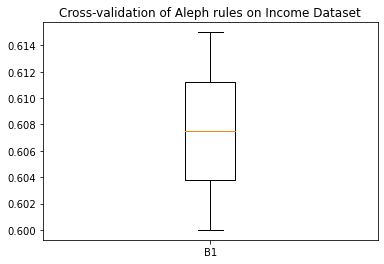

In [169]:
from matplotlib import pyplot
models = []

BK_1="income.pl"




models.append(('ILP',"B1", BK_1))


#print('****************  Emp Dataset ****************')
#pos, neg= aleph_pos_neg(pos_ex, neg_ex)
results1 = []
names1 = []

avg_time = []
for name, label, model2 in models:
    print("\n")
    print("****************** Rule sets generated by Aleph for Income Dataset:  ", label)
    if name=="ILP":
            BK_1="income.pl"


        # can be changed to 10 fold which will take longer to finish
            model_1=aleph_cross_validation(model2,  CV=2,  positive_example="income_pos.f", 
                                           negative_example="income_neg.n")
            cv_results=model_1.accuracy
    else:
        
        kfold = StratifiedKFold(n_splits=0, random_state=1)
        cv_results = cross_val_score(model2, X, y, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(model_1.time_learn)
    names1.append(label)
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Income Dataset')
pyplot.show()

# Code generated from Metagol Web Interface


# This is BK file created by MIL

In [168]:
from  PyILP.PyILP import *
try:
    model_1=metagol_learn(file="inc_bk.pl",test_size=0, settings="income_setting.pl", positive_example="income_pos.f", negative_example="income_neg.n")

except:
    pass

[]
+----------+ Learning +----------+
+---------------------+------------------+------------------+
|       n = 51        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 0                | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 20               | 31               |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accuracy    | 0.608 |
+-------------+-------+
| Precision   | None  |
+-------------+-------+
| Sensitivity | 0     |
+-------------+-------+
| Specificity | 1     |
+-------------+-------+
| F1 Score    | 0     |
+-------------+-------+


# Conclusion and Result


Conclusion and Result for both our Dataset:

From the above figures we have analyze  (this for Employee promotion dataset) that depending on the positive and negative file the accuracy of the model changes with 50 positive and 56 negative the accuracy is 52% approx and specificity score is around 90% , 

Similarly Let's compare the both Dataset accuracy when we have apply the aleph and MIL model

Here we can see that for the Employee Promotion dataset we are getting approx 52% accuracy and for Employee Income Data we are getting approx 60%+ accuracy . As we see for Employee Income dataset we are using this parameter to evaluating a model “model_1=aleph_cross_validation(model2,  CV=2,  positive_example="income_pos.f", 
negative_example="income_neg.n")” and Employee Promotion dataset we are using these parameter for making a model “model_1=aleph_cross_validation(model2,CV=2,  positive_example="emp_pos.f",negative_example="emp_neg.f")” and putting these result in K fold and finding the accuracy and thus it found that our second dataset i.e. Employee Income showing the better result as compared to the Employee Promotion Dataset . Further we have done some analyses on how our code is responding in Aleph and Metagol learn below are the result and screenshot for the same.

Aleph(ILP) Vs Matagol(MIL) for Employee Promotion Dataset

Aleph is showing really good results as compared to Matalog as in Matalog learn the positive and negative examples are really less as compared to aleph learn which is leading to low accuracy score as compared to Aleph learn. In the below screenshot we have shown the Matric result for both Aleph and Matalog learn.

                                                                                                                                                 

Aleph(ILP) Vs Matagol(MIL) for Employee Income Dataset:
Aleph is showing really good results as compared to Matalog as in Matalog learn the positive and negative examples are really less as compared to aleph learn which is leading to low accuracy score as compared to Aleph learn. In the below screenshot we have shown the Matric result for both Aleph and Matalog learn.

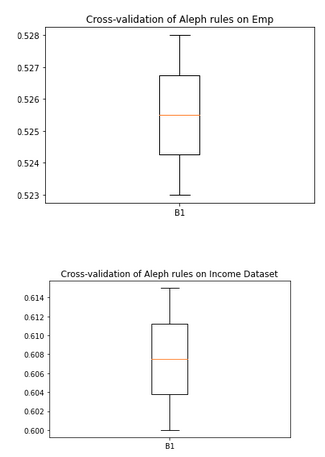
